In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Traveler Trip Dataset 
https://www.kaggle.com/datasets/rkiattisak/traveler-trip-data

In [2]:
# -- Showing DataSet -- #

file1 = pd.read_csv("../data/raw/travel_dataset.csv")
file1

,Trip ID,Destination,Start date,End date,Duration (days),Traveler name,Traveler age,Traveler gender,Traveler nationality,Accommodation type,Accommodation cost,Transportation type,Transportation cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,135,"Rio de Janeiro, Brazil",8/1/2023,8/10/2023,9.0,Jose Perez,37.0,Male,Brazilian,Hostel,2500,Car,2000
135,136,"Vancouver, Canada",8/15/2023,8/21/2023,6.0,Emma Wilson,29.0,Female,Canadian,Hotel,5000,Airplane,3000
136,137,"Bangkok, Thailand",9/1/2023,9/8/2023,7.0,Ryan Chen,34.0,Male,Chinese,Hostel,2000,Train,1000
137,138,"Barcelona, Spain",9/15/2023,9/22/2023,7.0,Sofia Rodriguez,25.0,Female,Spanish,Airbnb,6000,Airplane,2500


In [3]:
# -- Showing DataFrame Shape -- #

display(file1.shape)

(139, 13)

In [4]:
# -- Showing DataFrame Info -- #

display(file1.dtypes)

Trip ID                   int64
Destination              object
Start date               object
End date                 object
Duration (days)         float64
Traveler name            object
Traveler age            float64
Traveler gender          object
Traveler nationality     object
Accommodation type       object
Accommodation cost       object
Transportation type      object
Transportation cost      object
dtype: object

In [5]:
# -- Showing DataFrame Columns -- #

display(file1.columns)

Index(['Trip ID', 'Destination', 'Start date', 'End date', 'Duration (days)',
       'Traveler name', 'Traveler age', 'Traveler gender',
       'Traveler nationality', 'Accommodation type', 'Accommodation cost',
       'Transportation type', 'Transportation cost'],
      dtype='object')

#  cleaning & exploring

In [6]:
# -- Standardizing Column Names -- #
cols = []
for col in file1.columns:
    col = col.lower().replace(' ', '_')
    cols.append(col)
file1.columns = cols
file1.head()

,trip_id,destination,start_date,end_date,duration_(days),traveler_name,traveler_age,traveler_gender,traveler_nationality,accommodation_type,accommodation_cost,transportation_type,transportation_cost
0,1,"London, UK",5/1/2023,5/8/2023,7.0,John Smith,35.0,Male,American,Hotel,1200,Flight,600
1,2,"Phuket, Thailand",6/15/2023,6/20/2023,5.0,Jane Doe,28.0,Female,Canadian,Resort,800,Flight,500
2,3,"Bali, Indonesia",7/1/2023,7/8/2023,7.0,David Lee,45.0,Male,Korean,Villa,1000,Flight,700
3,4,"New York, USA",8/15/2023,8/29/2023,14.0,Sarah Johnson,29.0,Female,British,Hotel,2000,Flight,1000
4,5,"Tokyo, Japan",9/10/2023,9/17/2023,7.0,Kim Nguyen,26.0,Female,Vietnamese,Airbnb,700,Train,200


In [7]:
# -- Checking Null values -- #

file1.isna().sum()

trip_id                 0
destination             2
start_date              2
end_date                2
duration_(days)         2
traveler_name           2
traveler_age            2
traveler_gender         2
traveler_nationality    2
accommodation_type      2
accommodation_cost      2
transportation_type     3
transportation_cost     3
dtype: int64

In [8]:
# -- Showing null values by rows -- #

null_rows = file1[file1.isnull().any(axis=1)]
print(null_rows)


     trip_id  destination start_date   end_date  duration_(days)   
71        72          NaN        NaN        NaN              NaN  \
82        83  Rome, Italy  4/15/2025  4/22/2025              7.0   
127      128          NaN        NaN        NaN              NaN   

    traveler_name  traveler_age traveler_gender traveler_nationality   
71            NaN           NaN             NaN                  NaN  \
82      James Kim          41.0            Male             American   
127           NaN           NaN             NaN                  NaN   

    accommodation_type accommodation_cost transportation_type   
71                 NaN                NaN                 NaN  \
82               Hotel                100                 NaN   
127                NaN                NaN                 NaN   

    transportation_cost  
71                  NaN  
82                  NaN  
127                 NaN  


In [9]:
# -- Dropping null values as there are not many and it won't effect the outcome -- #

file1 = file1.dropna()

In [10]:
# -- Displaying null values after dropping them -- #

file1.isna().sum()

trip_id                 0
destination             0
start_date              0
end_date                0
duration_(days)         0
traveler_name           0
traveler_age            0
traveler_gender         0
traveler_nationality    0
accommodation_type      0
accommodation_cost      0
transportation_type     0
transportation_cost     0
dtype: int64

In [11]:
# -- Checking Duplicates -- #

duplicate = file1.duplicated()
duplicate.value_counts()

False    136
Name: count, dtype: int64

In [12]:
# -- Value counts for destination column -- #

file1.destination.value_counts()

destination
Paris                          7
Bali                           7
Tokyo, Japan                   7
Paris, France                  7
Tokyo                          5
Sydney                         5
Rome                           5
New York                       5
Bali, Indonesia                5
Rio de Janeiro, Brazil         4
Bangkok                        4
Cancun, Mexico                 4
Barcelona, Spain               4
London                         4
Rome, Italy                    3
Bangkok, Thailand              3
Sydney, Aus                    3
London, UK                     3
New York, USA                  3
Sydney, Australia              3
Vancouver, Canada              2
New York City, USA             2
Barcelona                      2
Cape Town                      2
Dubai                          2
Amsterdam, Netherlands         2
Bangkok, Thai                  1
Seoul, South Korea             1
Los Angeles, USA               1
Cape Town, SA                  

In [13]:
# -- Replacing cities or countries under country name -- # 
# -- we apply this to avoid having repeatation -- #
# --  performing a data manipulation task called "data cleaning" or "data preprocessing" -- #

file1['destination'] = file1['destination'].replace({'Paris, France':'France',
                                                  'Bali, Indonesia':'Indonesia',
                                                  'Tokyo, Japan':'Japan',
                                                  'Rio de Janeiro, Brazil':'Brazil',
                                                  'Cancun, Mexico':'Mexico',
                                                  'Barcelona, Spain':'Spain',
                                                  'Bangkok, Thailand':'Thailand',
                                                  'Sydney, Aus':'Australia',
                                                  'London, UK':'UK',
                                                  'New York, USA':'USA',
                                                  'Sydney, Australia':'Australia',
                                                  'Vancouver, Canada':'Canada',
                                                  'New York City, USA':'USA',
                                                  'Amsterdam, Netherlands':'Netherlands',
                                                  'Bangkok, Thai':'Thailand',
                                                  'Seoul, South Korea':'South Korea',
                                                  'Los Angeles, USA':'USA',
                                                  'Cape Town, SA':'South Africa',
                                                  'Cape Town, South Africa':'South Africa',
                                                  'Athens, Greece':'Greece',
                                                  'Sydney, AUS':'Australia',
                                                  'Phuket, Thai':'Thailand',
                                                  'Dubai, United Arab Emirates':'United Arab Emirates',
                                                  'Honolulu, Hawaii':'USA',
                                                  'Berlin, Germany':'Germany',
                                                  'Marrakech, Morocco':'Morocco',
                                                  'Edinburgh, Scotland':'Scotland',
                                                  'Phuket, Thailand':'Thailand',
                                                  'Auckland, New Zealand':'New Zealand',
                                                  'Rome, Italy':'Italy'})

C:\Users\Home\AppData\Local\Temp\ipykernel_14444\653240644.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file1['destination'] = file1['destination'].replace({'Paris, France':'France',


In [14]:
# -- Value counts for destination column after applying data manipulation -- #

file1.destination.value_counts()

destination
Japan                   8
France                  8
Australia               8
Bali                    7
USA                     7
Paris                   7
Thailand                7
Sydney                  5
Spain                   5
Rome                    5
Tokyo                   5
Mexico                  5
New York                5
Brazil                  5
Indonesia               5
Bangkok                 4
London                  4
Italy                   4
Canada                  3
UK                      3
Cape Town               2
Dubai                   2
Barcelona               2
Greece                  2
Netherlands             2
South Africa            2
Phnom Penh              1
Santorini               1
Phuket                  1
Amsterdam               1
Rio de Janeiro          1
Seoul                   1
Scotland                1
Morocco                 1
South Korea             1
United Arab Emirates    1
Egypt                   1
Hawaii                  1


In [15]:
# -- Putting cities to their respective countries to evaluate as per country -- #

city_to_country = {'Paris': 'France',
                   'Bali': 'Indonesia',
                   'Tokyo': 'Japan',
                   'Rio de Janeiro': 'Brazil',
                   'Cancun': 'Mexico',
                   'Barcelona': 'Spain',
                   'Bangkok': 'Thailand',
                   'Sydney': 'Australia',
                   'London': 'UK',
                   'New York': 'USA',
                   'Vancouver': 'Canada',
                   'Amsterdam': 'Netherlands',
                   'Seoul': 'South Korea',
                   'Cape Town': 'South Africa',
                   'Athens': 'Greece',
                   'Phuket': 'Thailand',
                   'Dubai': 'United Arab Emirates',
                   'Honolulu': 'Hawaii',
                   'Berlin': 'Germany',
                   'Marrakech': 'Morocco',
                   'Edinburgh': 'Scotland',
                   'Auckland': 'New Zealand',
                   'Phnom Penh' : 'Cambodia',
                   'Santorini': 'Greece',
                   'Rome': 'Italy'}

file1['destination'] = file1['destination'].replace(city_to_country)

C:\Users\Home\AppData\Local\Temp\ipykernel_14444\4293257733.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file1['destination'] = file1['destination'].replace(city_to_country)


In [16]:
# -- Final count for column destination by country -- #

file1.destination.value_counts()

destination
France                  15
Japan                   13
Australia               13
Thailand                12
Indonesia               12
USA                     12
Italy                    9
UK                       7
Spain                    7
Brazil                   6
Mexico                   5
South Africa             4
United Arab Emirates     3
Canada                   3
Netherlands              3
Greece                   3
South Korea              2
Cambodia                 1
Germany                  1
Egypt                    1
Hawaii                   1
Scotland                 1
Morocco                  1
New Zealand              1
Name: count, dtype: int64

In [17]:
# -- Value count for transportation column -- #

file1.transportation_type.value_counts()

transportation_type
Plane         57
Train         37
Flight        13
Car rental    13
Bus            6
Airplane       5
Car            3
Subway         1
Ferry          1
Name: count, dtype: int64

In [18]:
# -- Here I am combining same mode of transport with different known names under one name -- #
# -- For this dataset I had 3 different names for air transporattion which I had combine under "Air travel" -- #

file1.replace({"Plane": "Air travel", "Flight": "Air travel", "Airplane": "Air travel"}, inplace=True)

C:\Users\Home\AppData\Local\Temp\ipykernel_14444\3874847957.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file1.replace({"Plane": "Air travel", "Flight": "Air travel", "Airplane": "Air travel"}, inplace=True)


In [19]:
# -- Value count after applying replace function above -- #

file1.transportation_type.value_counts()

transportation_type
Air travel    75
Train         37
Car rental    13
Bus            6
Car            3
Subway         1
Ferry          1
Name: count, dtype: int64

# Destination Preferences 




* Single variable plots

* Single variable plot helps you to know/read your dataset better

* Now let's explore the most frequent destination

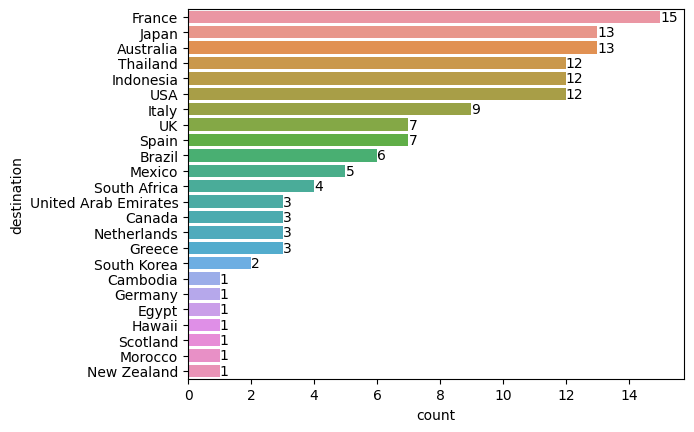

In [20]:
ax = sns.countplot(y=file1.destination, order=list(file1.destination.value_counts().index))
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=0)
plt.savefig("../Images/Destination.png", dpi=300)
plt.show()

# Accomodation Preferences

* Now let's explore the most frequent accomodation type.

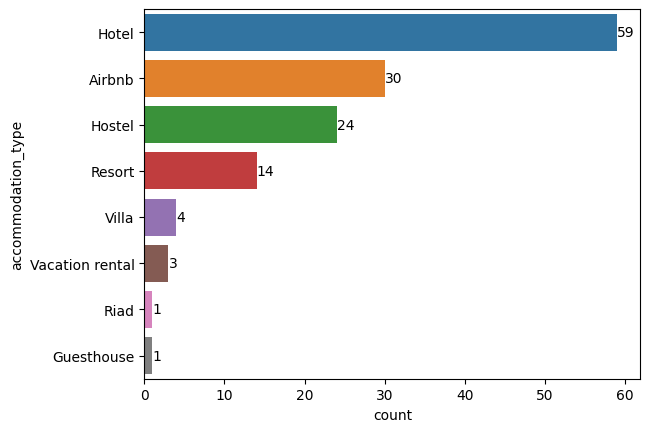

In [21]:
ax = sns.countplot(y=file1.accommodation_type, order=list(file1.accommodation_type.value_counts().index))
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=0)
plt.savefig("../Images/Accommodation Type.png", dpi=300)
plt.show()

# Transportation Preferences

* Checking for the most use transportation type 

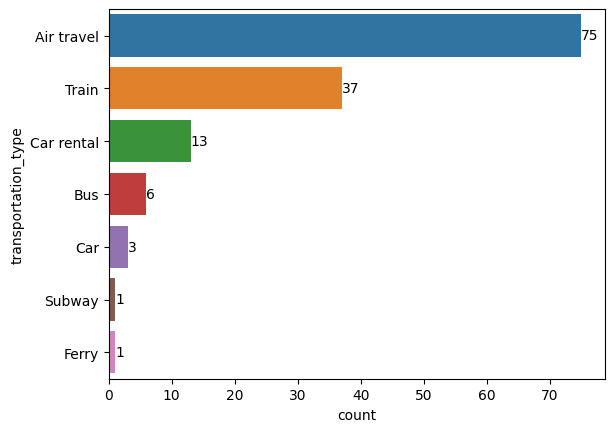

In [22]:
ax = sns.countplot(y=file1.transportation_type, order=list(file1.transportation_type.value_counts().index))
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=0)
plt.savefig("../Images/Transportation_Type.png", dpi=300)
plt.show()

# Most popular destination by gender


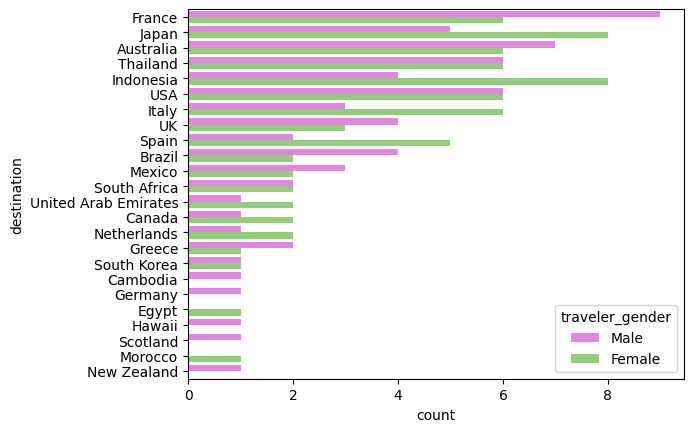

In [23]:
my_palette = {"Female": "#8FD970", "Male": "#EE7AEE"}
sns.countplot(y=file1.destination, hue=file1.traveler_gender, palette=my_palette, order=list(file1.destination.value_counts().index))
plt.xticks(rotation=0)
plt.savefig("../Images/destination_by_traveler_gender.png", dpi=300)
plt.show()



# Most popular accommodation type by gender



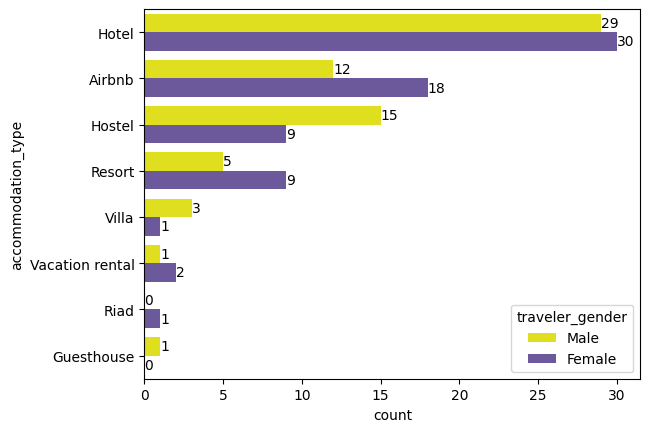

In [24]:
my_palette = {"Female": "#674EA7", "Male": "#FFFF00"}
ax = sns.countplot(y=file1.accommodation_type, hue=file1.traveler_gender, palette=my_palette, order=list(file1.accommodation_type.value_counts().index))
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=0)
plt.savefig("../Images/accommodation_type_by_traveler_gender.png", dpi=300)
plt.show()

# Most Popular transportation type by gender 

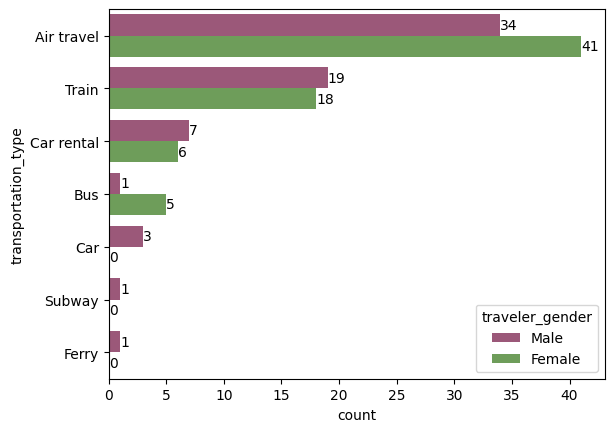

In [25]:
my_palette = {"Female": "#6AA84F", "Male": "#A64D79"}
ax = sns.countplot(y=file1.transportation_type, hue=file1.traveler_gender, palette=my_palette,  order=list(file1.transportation_type.value_counts().index))
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=0)
plt.savefig("../Images/transportation_type_by_traveler_gender.png", dpi=300)
plt.show()

In [26]:
file1.to_csv("../data/clean/travel_dataset.csv", index=False)

# Conclusions

##### In conclusion, our analysis of the traveler trip dataset using Python has provided valuable insights into the travel patterns and preferences of genders. The results of our analysis suggest that males and females have different travel behaviors when it comes to destination, transportation mode, and accommodation type. By identifying these differences, travel businesses and policymakers can make informed decisions to provide better travel experiences and improve the overall tourism industry.